         X1        X2    Y
0  2.781084  2.550537  0.0
1  1.465489  2.362125  0.0
2  3.396562  4.400294  0.0
3  1.388070  1.850220  0.0
4  3.064072  3.005306  0.0
5  7.627531  2.759262  1.0
6  5.332441  2.088627  1.0
7  6.922597  1.771064  1.0
8  8.675419 -0.242070  1.0
9  7.673756  3.508563  1.0
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


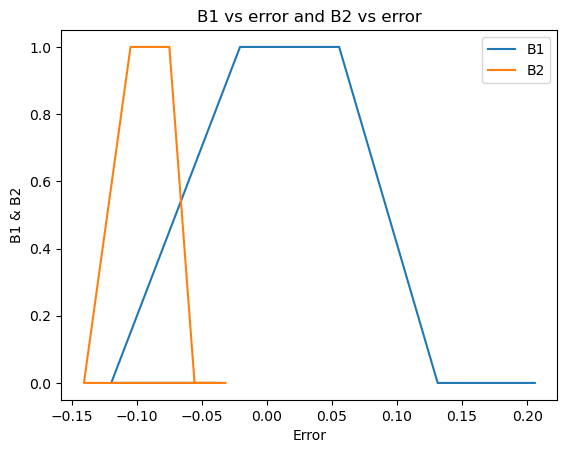

Iteration:1-->accuracy:80.0,error:0.2
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


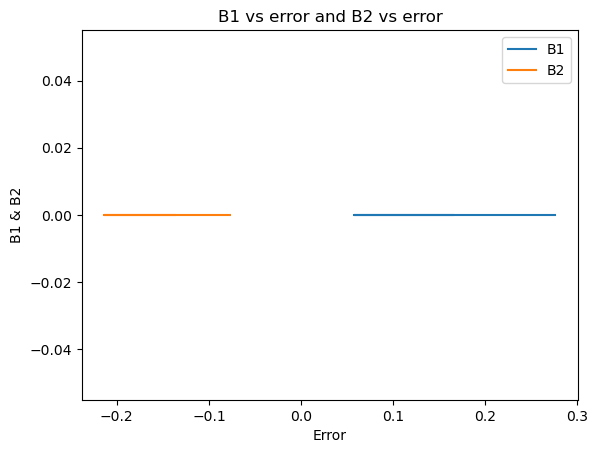

Iteration:2-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


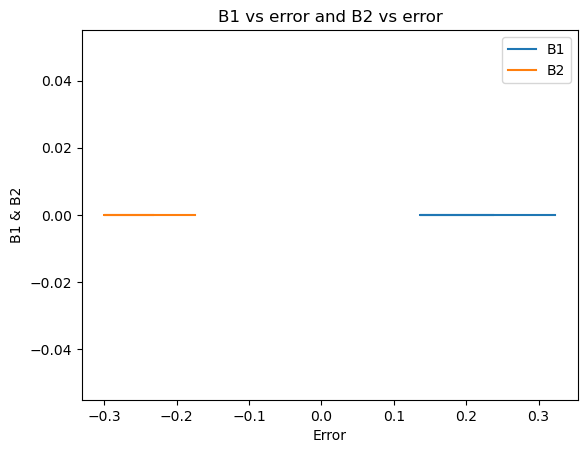

Iteration:3-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


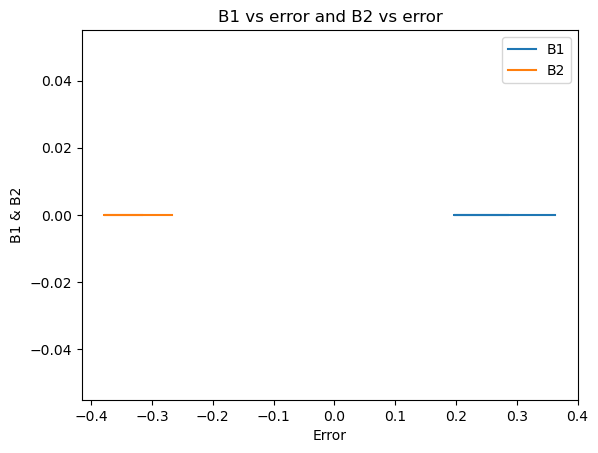

Iteration:4-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


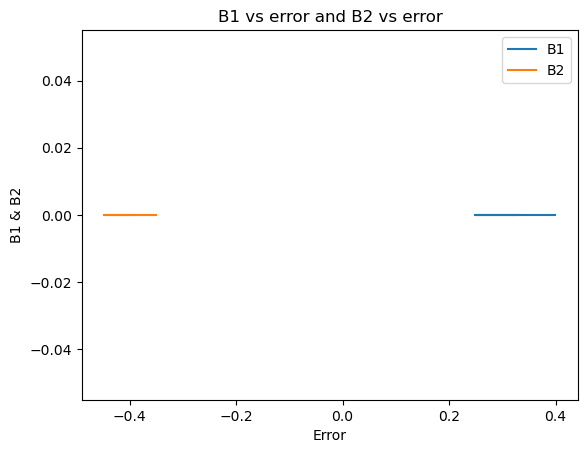

Iteration:5-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


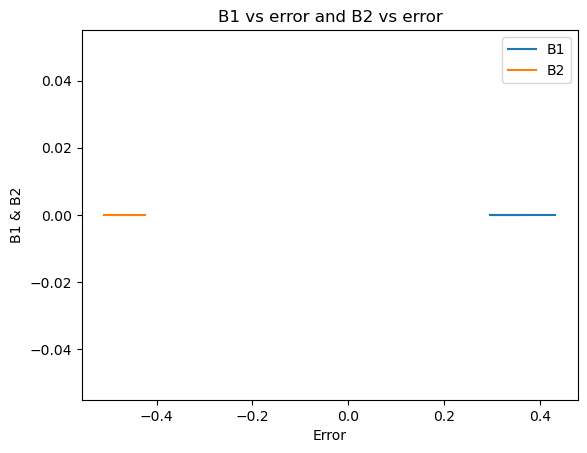

Iteration:6-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


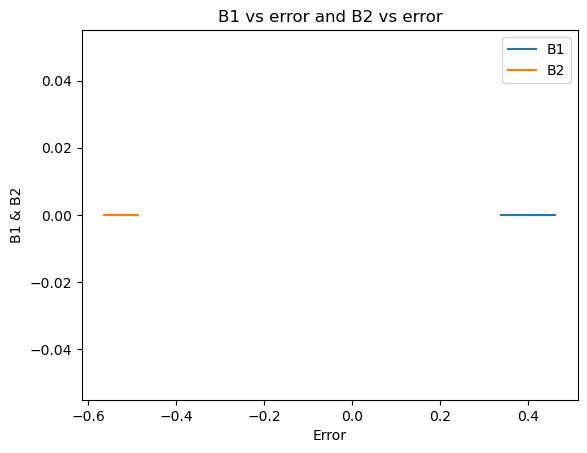

Iteration:7-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


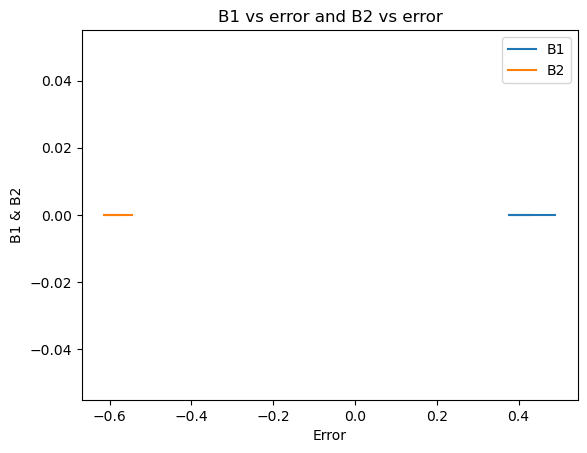

Iteration:8-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


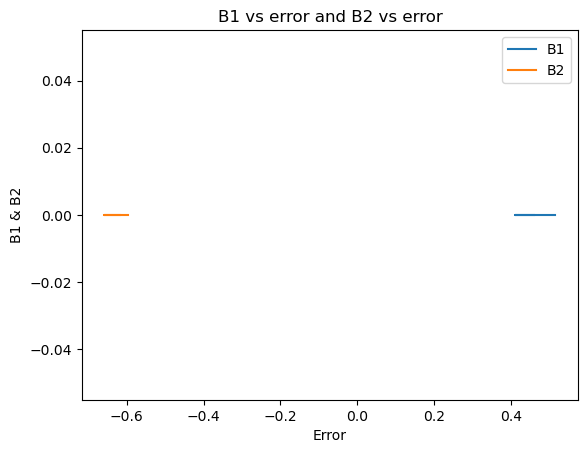

Iteration:9-->accuracy:100.0,error:0.0
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


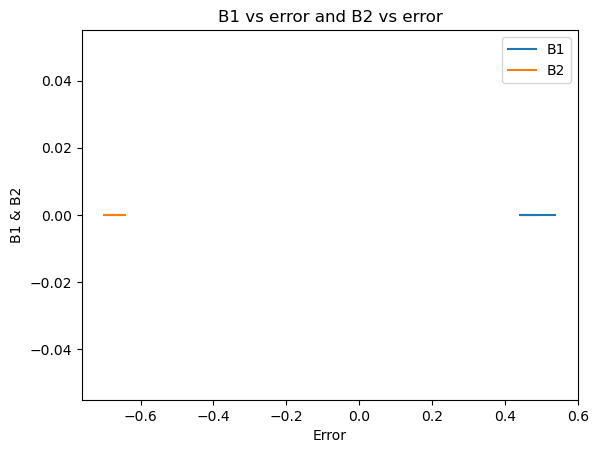

Iteration:10-->accuracy:100.0,error:0.0


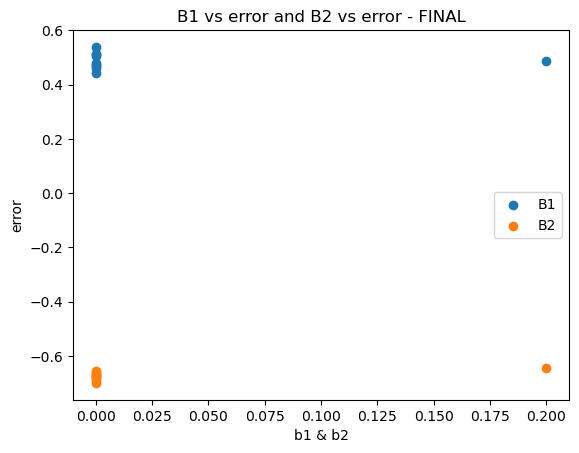

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
data['X1'] = data['X1'].astype(float)
data['X2'] = data['X2'].astype(float)
data['Y'] = data['Y'].astype(float)
print(data)
x1=np.array(data['X1'])
x1=x1.astype(float)
x2=np.array(data['X2'])
x2=x2.astype(float)
y=np.array(data['Y'])
y=y.astype(float)

rate = 0.1
b0=0.0
b1=0.0
b2=0.0
b_1=[]
b_2=[]
errors=[]
def sigmoid(b0,b1,b2,x1,x2):
    z = b0 + b1 * x1 + b2 * x2
    pred = 1.0 / (1.0 + np.exp(-z))
    return pred
def updation(pred,b,y,x):
    b=b+(rate*(y-pred)*pred*(1-pred)*x)
    return b
iterations=10
for j in range(iterations):
    y_new=[]
    acc=0
    error=[]
    b_1=[]
    b_2=[]
    e=0.0
    for i in range(len(x1)):
        pred=sigmoid(b0,b1,b2,x1[i],x2[i])
        y_new.append(pred)
        b0=updation(pred,b0,y[i],1.0)
        b1=updation(pred,b1,y[i],x1[i])
        b_1.append(b1)
        b2=updation(pred,b2,y[i],x2[i])
        b_2.append(b2)
        y_pred=b0+b1*x1[i]+b2*x2[i]
        if(y_pred>0.5):
            y_pred=1
        else:
            y_pred=0
        y_new.append(y_pred)
        e=(y[i]-y_new[i])
        error.append(e)
    err=np.sum(error)/len(error)
    errors.append(err)
    print(y_new)
    plt.plot(b_1,error,label="B1")
    plt.plot(b_2,error,label='B2')
    plt.title('B1 vs error and B2 vs error')
    plt.xlabel('Error')
    plt.legend()
    plt.ylabel('B1 & B2')
    plt.show()
    for i in range(len(y)):
        if(y[i]==y_new[i]):
            acc=acc+1
    accuracy=(acc/len(y))*100
    print(f"Iteration:{j+1}-->accuracy:{accuracy},error:{err}")
    
    
plt.scatter(errors,b_1,label="B1")
plt.scatter(errors,b_2,label='B2')
plt.title('B1 vs error and B2 vs error - FINAL')
plt.xlabel('b1 & b2')
plt.legend()
plt.ylabel('error')
plt.show()       
        

        

    
    
    

In [2]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x1=x1.reshape(-1,1)
# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x1, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x1)
y_pred = model.predict(x1)
score_ = model.score(x1, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
print(y_pred)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
df = pd.read_csv('logistic.csv')

X = df[['X1', 'X2']]
Y = df['Y']

X['intercept'] = 1

# Initialize coefficients (B0, B1, and B2) with zeros
B = np.zeros(3)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
learning_rate = 0.01
num_iterations = 100

for _ in range(num_iterations):
    z = np.dot(X, B)
    predictions = sigmoid(z)
    gradient = np.dot(X.T, (predictions - Y)) / len(Y)
    B -= learning_rate * gradient

B0, B1, B2 = B

print(f"Intercept (B0): {B0}")
print(f"Coefficient (B1): {B1}")
print(f"Coefficient (B2): {B2}")

z = np.dot(X, B)
predictions = sigmoid(z)
error = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
print(f"Log Loss (Error): {error}")

threshold = 0.5
predicted_labels = (predictions >= threshold).astype(int)
accuracy = np.mean(predicted_labels == Y)
print(f"Accuracy: {accuracy}")

FileNotFoundError: [Errno 2] No such file or directory: 'logistic.csv'

In [ ]:
for index, row in df.iterrows():
    X_test = np.array([1, row['X1'], row['X2']])
    z_test = np.dot(X_test, B)
    prediction = sigmoid(z_test)
    actual = row['Y']
    error = - (actual * np.log(prediction) + (1 - actual) * np.log(1 - prediction))
    print(f"{index}: Act={actual}, Pred={prediction}, Error={error}")


In [ ]:
B1_values = np.linspace(B1 - 2, B1 + 2, 100)
B2_values = np.linspace(B2 - 2, B2 + 2, 100)
error_values_B1 = []
error_values_B2 = []
for b1 in B1_values:
    B[1] = b1
    z = np.dot(X, B)
    predictions = sigmoid(z)
    error = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
    error_values_B1.append(error)

for b2 in B2_values:
    B[2] = b2
    z = np.dot(X, B)
    predictions = sigmoid(z)
    error = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
    error_values_B2.append(error)

plt.figure(figsize=(10, 5))
plt.plot(B1_values, error_values_B1)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(B2_values, error_values_B2)
plt.xlabel('B2')
plt.ylabel('Error')
plt.title('B2 vs. Error')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

df = pd.read_csv('logistic.csv')

X = df[['X1', 'X2']]
Y = df['Y']
model = LogisticRegression()

model.fit(X, Y)

B0_sklearn = model.intercept_[0]
B1_sklearn, B2_sklearn = model.coef_[0]
print("Using scikit-learn Logistic Regression:")
print(f"Intercept (B0): {B0_sklearn}")
print(f"Coefficient (B1): {B1_sklearn}")
print(f"Coefficient (B2): {B2_sklearn}")

predictions_sklearn = model.predict(X)
probabilities_sklearn = model.predict_proba(X)[:, 1]
error_sklearn = log_loss(Y, probabilities_sklearn)
print(f"Log Loss (Error) using scikit-learn: {error_sklearn}")

accuracy_sklearn = accuracy_score(Y, predictions_sklearn)
print(f"Accuracy using scikit-learn: {accuracy_sklearn}")


for index, row in df.iterrows():
    X_test = np.array(row[['X1', 'X2']]).reshape(1, -1)
    prediction = model.predict(X_test)[0]
    probability = model.predict_proba(X_test)[0][1]
    actual = row['Y']
    
    labels = [0, 1]
    error = log_loss([actual], [probability], labels=labels)
    
    print(f"Instance {index}: Actual={actual}, Predicted={prediction}, Error={error}")


B1_values = np.linspace(B1_sklearn - 2, B1_sklearn + 2, 100)
error_values_B1 = []

for b1 in B1_values:
    model.coef_ = np.array([[b1, B2_sklearn]])
    predictions = model.predict(X)
    error = log_loss(Y, model.predict_proba(X)[:, 1])
    error_values_B1.append(error)

plt.figure(figsize=(10, 5))
plt.plot(B1_values, error_values_B1)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error (scikit-learn)')
plt.grid(True)
plt.show()

B2_values = np.linspace(B2_sklearn - 2, B2_sklearn + 2, 100)
error_values_B2 = []

for b2 in B2_values:
    model.coef_ = np.array([[B1_sklearn, b2]])
    predictions = model.predict(X)
    error = log_loss(Y, model.predict_proba(X)[:, 1])
    error_values_B2.append(error)

plt.figure(figsize=(10, 5))
plt.plot(B2_values, error_values_B2)
plt.xlabel('B2')
plt.ylabel('Error')
plt.title('B2 vs. Error (scikit-learn)')
plt.grid(True)
plt.show()
